<a href="https://colab.research.google.com/github/laxmipriyapadegal2024/LLM-from-Scratch-101/blob/main/LLMs104.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## [*Click to see what we covered so far*](https:https://colab.research.google.com/drive/1G7JyATo2_LZSvpVYfJNdKwp_6v73vlEp)

[Attention is all you need paper](https://arxiv.org/pdf/1706.03762)

[Bahdanau Atention Paper](https://arxiv.org/pdf/1409.0473)

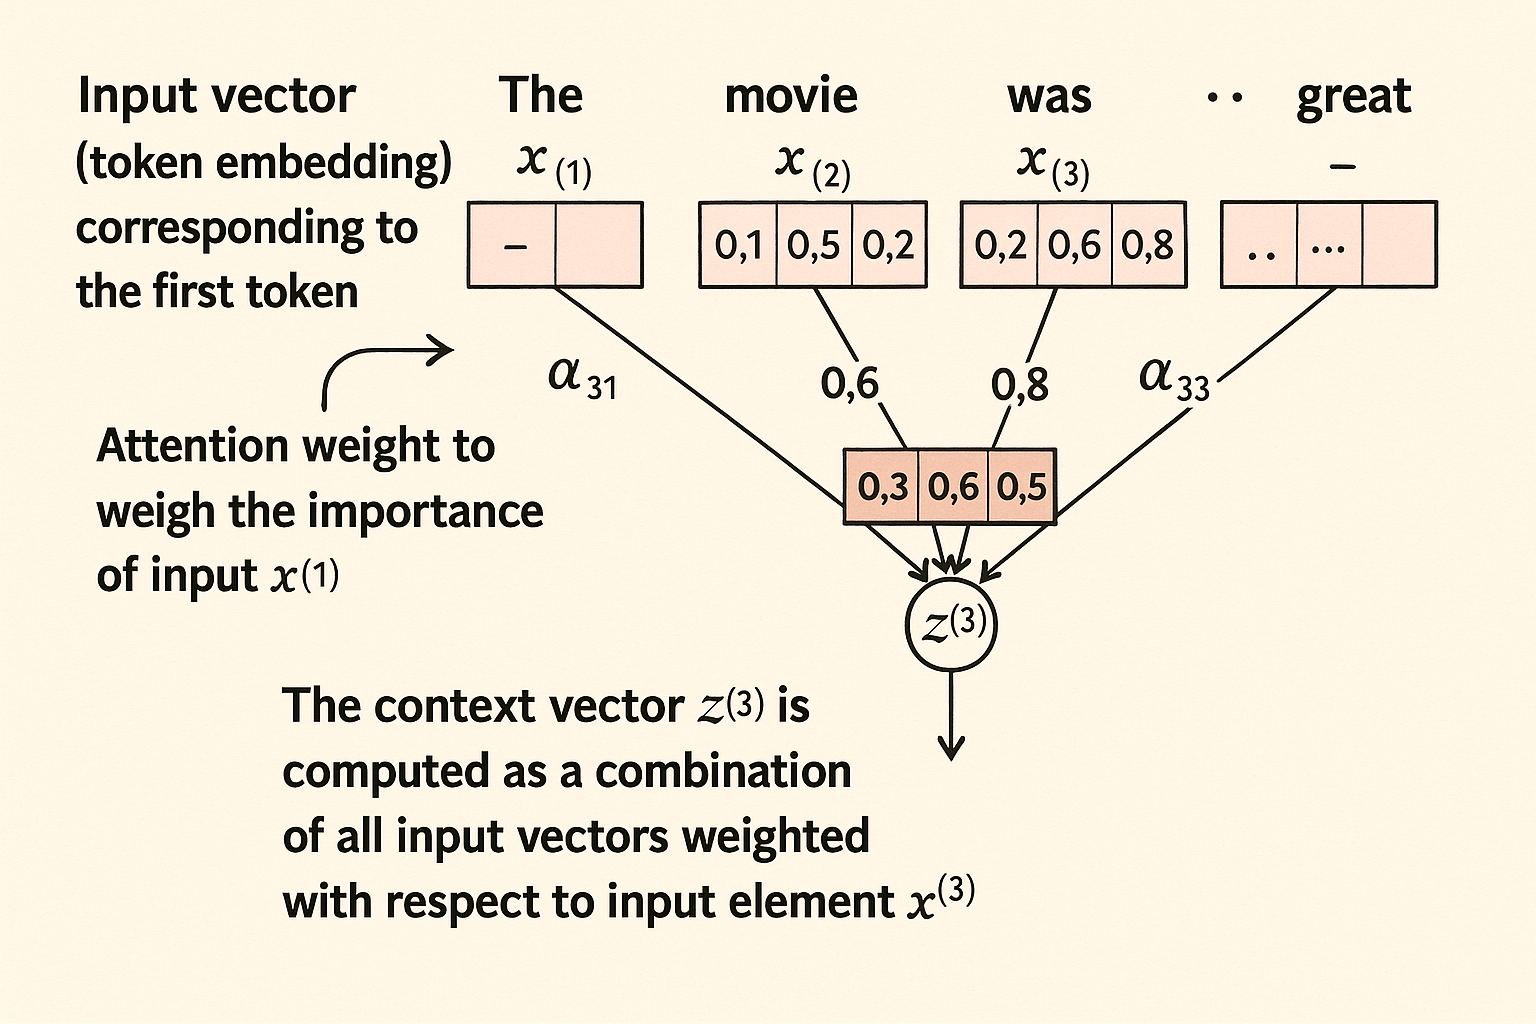

## **Simplified Attention Mechanism**

In [3]:
import torch
words=["Your","journey","starts","with","one","step"]
inputs=torch.tensor([[0.43,0.15,0.89],  #x^1
                     [0.55,0.87,0.66],  #x^2
                     [0.57,0.85,0.64],  #x^3
                     [0.22,0.58,0.33],  #x^4
                     [0.77,0.25,0.10],  #x^5
                     [0.05,0.80,0.55]]  #x^6
                    )

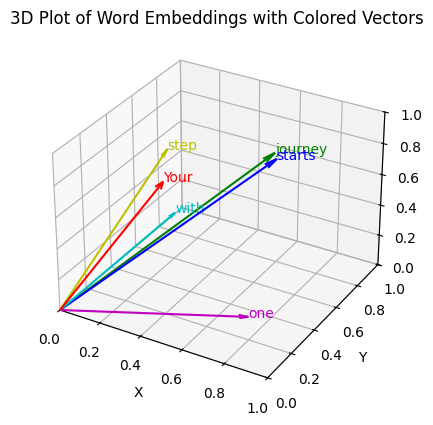

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

x_coords = inputs[:, 0].numpy()
y_coords = inputs[:, 1].numpy()
z_coords = inputs[:, 2].numpy()


# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()


In [5]:
query=inputs[1]
attn_score2=torch.empty(inputs.shape[0])
for i ,x in enumerate(inputs):
  attn_score2[i]=torch.dot(query,x)
attn_score2

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])

In [6]:
#Normalizing it using averages
attn_weights2_tmp=attn_score2/torch.sum(attn_score2)
print(attn_weights2_tmp)
print(torch.sum(attn_weights2_tmp))

tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
tensor(1.0000)


In [7]:
#Normalizing using PyTorch softmax-- eliminates over and underflow issues
import torch.nn.functional as F
attn_weights2_softmax=F.softmax(attn_score2,dim=0)
print(attn_weights2_softmax)
print(torch.sum(attn_weights2_softmax))

tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
tensor(1.)


In [8]:
#Computing Context vector
context2=torch.zeros(inputs.shape[1])
for i,x in enumerate(inputs):
  context2+=attn_weights2_softmax[i]*x
context2

tensor([0.4419, 0.6515, 0.5683])

### **Let's now do it for all the words**

In [9]:
attn_scores=inputs @ inputs.T
attn_scores

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])

In [10]:
attn_weights=F.softmax(attn_scores,dim=1)
attn_weights

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])

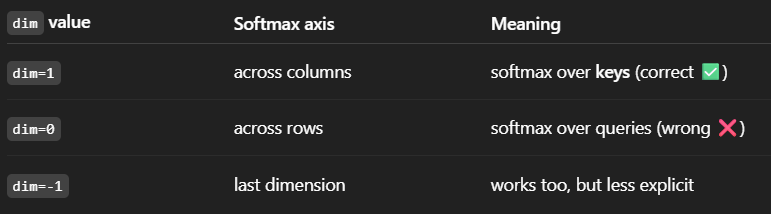

In [11]:
context_vectors=attn_weights @ inputs
context_vectors

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])

## Self-Attention

In [12]:
import torch
words=["Your","journey","starts","with","one","step"]
inputs=torch.tensor([[0.43,0.15,0.89],  #x^1
                     [0.55,0.87,0.66],  #x^2
                     [0.57,0.85,0.64],  #x^3
                     [0.22,0.58,0.33],  #x^4
                     [0.77,0.25,0.10],  #x^5
                     [0.05,0.80,0.55]]  #x^6
                    )

In [13]:
x_2=inputs[1]
d_in=inputs.shape[1]
d_out=2

In [14]:
torch.manual_seed(123)
W_query = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_key = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)
W_value = torch.nn.Parameter(torch.rand(d_in, d_out), requires_grad=False)

In [15]:
query2=x_2@W_query
key2=x_2@W_key
value2=x_2@W_value
print(query2)
print(key2)
print(value2)

tensor([0.4306, 1.4551])
tensor([0.4433, 1.1419])
tensor([0.3951, 1.0037])


In [16]:
queries=inputs@W_query
keys=inputs@W_key
values=inputs@W_value
print(queries)
print(keys)
print(values)

tensor([[0.2309, 1.0966],
        [0.4306, 1.4551],
        [0.4300, 1.4343],
        [0.2355, 0.7990],
        [0.2983, 0.6565],
        [0.2568, 1.0533]])
tensor([[0.3669, 0.7646],
        [0.4433, 1.1419],
        [0.4361, 1.1156],
        [0.2408, 0.6706],
        [0.1827, 0.3292],
        [0.3275, 0.9642]])
tensor([[0.1855, 0.8812],
        [0.3951, 1.0037],
        [0.3879, 0.9831],
        [0.2393, 0.5493],
        [0.1492, 0.3346],
        [0.3221, 0.7863]])


Finding attention scores using queries and keys

In [17]:
attn_scores=queries@torch.transpose(keys,0,1)
attn_scores

tensor([[0.9231, 1.3545, 1.3241, 0.7910, 0.4032, 1.1330],
        [1.2705, 1.8524, 1.8111, 1.0795, 0.5577, 1.5440],
        [1.2544, 1.8284, 1.7877, 1.0654, 0.5508, 1.5238],
        [0.6973, 1.0167, 0.9941, 0.5925, 0.3061, 0.8475],
        [0.6114, 0.8819, 0.8626, 0.5121, 0.2707, 0.7307],
        [0.8995, 1.3165, 1.2871, 0.7682, 0.3937, 1.0996]])

In [18]:
'''For stability we divide by sqrt of the embedding dimention because softmax
is very sensitive to magnitude'''
d_k=keys.shape[1]
attn_scores_tmp=attn_scores/torch.sqrt(torch.tensor(d_k))
attn_scores_tmp

tensor([[0.6528, 0.9578, 0.9363, 0.5593, 0.2851, 0.8011],
        [0.8984, 1.3098, 1.2806, 0.7633, 0.3944, 1.0918],
        [0.8870, 1.2929, 1.2641, 0.7534, 0.3895, 1.0775],
        [0.4930, 0.7189, 0.7029, 0.4190, 0.2164, 0.5993],
        [0.4323, 0.6236, 0.6099, 0.3621, 0.1914, 0.5167],
        [0.6361, 0.9309, 0.9101, 0.5432, 0.2784, 0.7776]])

In [19]:
attn_weights=torch.nn.functional.softmax(attn_scores,dim=1)
attn_weights

tensor([[0.1484, 0.2285, 0.2217, 0.1301, 0.0883, 0.1831],
        [0.1401, 0.2507, 0.2406, 0.1157, 0.0687, 0.1842],
        [0.1406, 0.2496, 0.2397, 0.1164, 0.0696, 0.1841],
        [0.1548, 0.2130, 0.2083, 0.1394, 0.1047, 0.1799],
        [0.1577, 0.2067, 0.2028, 0.1428, 0.1122, 0.1777],
        [0.1494, 0.2267, 0.2202, 0.1310, 0.0901, 0.1825]])

In [20]:
context_vectors=attn_weights@values
context_vectors

tensor([[0.3071, 0.8230],
        [0.3157, 0.8430],
        [0.3152, 0.8421],
        [0.3006, 0.8080],
        [0.2978, 0.8016],
        [0.3063, 0.8214]])

**Building a Self-Attention class**

In [21]:
import torch.nn as nn
class Self_Attention_v1(nn.Module):
  def __init__(self,d_in,d_out):
    super().__init__()
    self.W_q=nn.Parameter(torch.rand(d_in,d_out))
    self.W_k=nn.Parameter(torch.rand(d_in,d_out))
    self.W_v=nn.Parameter(torch.rand(d_in,d_out))

  def forward(self,x):
    keys=x@self.W_k
    queries=x@self.W_q
    values=x@self.W_v
    attn_scores=queries@keys.T
    attn_weights=torch.nn.functional.softmax(attn_scores/keys.shape[1]**0.5,dim=1)
    context_vectors=attn_weights@values
    return context_vectors

In [22]:
torch.manual_seed(123)
self_attention1=Self_Attention_v1(3,2)
self_attention1(inputs)

tensor([[0.2996, 0.8053],
        [0.3061, 0.8210],
        [0.3058, 0.8203],
        [0.2948, 0.7939],
        [0.2927, 0.7891],
        [0.2990, 0.8040]], grad_fn=<MmBackward0>)

In [23]:
class Self_Attention_v2(nn.Module):
  def __init__(self,d_in,d_out,qkv_bias=False):
    super().__init__()
    self.W_q=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_k=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_v=nn.Linear(d_in,d_out,bias=qkv_bias)

  def forward(self,x):
    keys=self.W_k(x)
    queries=self.W_q(x)
    values=self.W_v(x)
    attn_scores=queries@keys.T
    attn_weights=torch.softmax(attn_scores/keys.shape[1]**0.5,dim=1)
    context_vectors=attn_weights@values
    return context_vectors

v1 is good for learning the math from scratch (you implement the attention mechanics manually).

v2 is how you'd actually write it in a real transformer model — cleaner, flexible, scalable.

In [24]:
torch.manual_seed(789)
self_attention2=Self_Attention_v2(d_in,d_out)
self_attention2(inputs)

tensor([[-0.0739,  0.0713],
        [-0.0748,  0.0703],
        [-0.0749,  0.0702],
        [-0.0760,  0.0685],
        [-0.0763,  0.0679],
        [-0.0754,  0.0693]], grad_fn=<MmBackward0>)

## Causal Attention

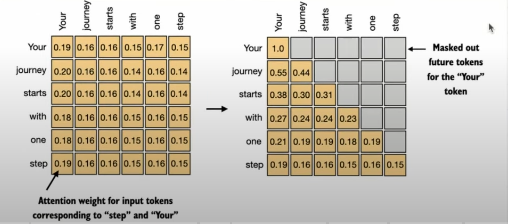

In [25]:
queries=self_attention2.W_q(inputs)
keys=self_attention2.W_k(inputs)
values=self_attention2.W_v(inputs)
attn_scores=queries@keys.T
attn_weights=torch.softmax(attn_scores/keys.shape[1]**0.5,dim=1)
attn_weights

tensor([[0.1921, 0.1646, 0.1652, 0.1550, 0.1721, 0.1510],
        [0.2041, 0.1659, 0.1662, 0.1496, 0.1665, 0.1477],
        [0.2036, 0.1659, 0.1662, 0.1498, 0.1664, 0.1480],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.1661, 0.1564],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.1585],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)

In [26]:
context_length=inputs.shape[0]
causal_mask=torch.tril(torch.ones(context_length,context_length))
causal_mask

tensor([[1., 0., 0., 0., 0., 0.],
        [1., 1., 0., 0., 0., 0.],
        [1., 1., 1., 0., 0., 0.],
        [1., 1., 1., 1., 0., 0.],
        [1., 1., 1., 1., 1., 0.],
        [1., 1., 1., 1., 1., 1.]])

In [27]:
causal_weights=torch.tril(attn_weights)
print(causal_weights)
print(attn_weights*causal_mask)

tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<TrilBackward0>)
tensor([[0.1921, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2041, 0.1659, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.2036, 0.1659, 0.1662, 0.0000, 0.0000, 0.0000],
        [0.1869, 0.1667, 0.1668, 0.1571, 0.0000, 0.0000],
        [0.1830, 0.1669, 0.1670, 0.1588, 0.1658, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<MulBackward0>)


In [28]:
row_sums=causal_weights.sum(dim=1,keepdim=True)
print(row_sums)
causal_nrml_weights=causal_weights/row_sums
print(causal_nrml_weights)

tensor([[0.1921],
        [0.3700],
        [0.5357],
        [0.6775],
        [0.8415],
        [1.0000]], grad_fn=<SumBackward1>)
tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<DivBackward0>)


An easier and more efficient way to do this:

In [29]:
mask=torch.triu(torch.ones(context_length,context_length),diagonal=1)
causal_attn_scores_masked=attn_scores.masked_fill(mask.bool(),-torch.inf)
print(causal_attn_scores_masked)

tensor([[0.2899,   -inf,   -inf,   -inf,   -inf,   -inf],
        [0.4656, 0.1723,   -inf,   -inf,   -inf,   -inf],
        [0.4594, 0.1703, 0.1731,   -inf,   -inf,   -inf],
        [0.2642, 0.1024, 0.1036, 0.0186,   -inf,   -inf],
        [0.2183, 0.0874, 0.0882, 0.0177, 0.0786,   -inf],
        [0.3408, 0.1270, 0.1290, 0.0198, 0.1290, 0.0078]],
       grad_fn=<MaskedFillBackward0>)


In [30]:
attn_weights=torch.softmax(causal_attn_scores_masked/keys.shape[1]**0.5,dim=1)
print(attn_weights)

tensor([[1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4483, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.3800, 0.3097, 0.3103, 0.0000, 0.0000, 0.0000],
        [0.2758, 0.2460, 0.2462, 0.2319, 0.0000, 0.0000],
        [0.2175, 0.1983, 0.1984, 0.1888, 0.1971, 0.0000],
        [0.1935, 0.1663, 0.1666, 0.1542, 0.1666, 0.1529]],
       grad_fn=<SoftmaxBackward0>)


**Considering Dropouts and Masking additional attention weights with a dropout mask**

In [31]:
torch.manual_seed(123)
dropout=nn.Dropout(p=0.5)
attn_weights_dropout=dropout(attn_weights)
print(attn_weights_dropout)

tensor([[2.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.8966, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.6206, 0.0000, 0.0000, 0.0000],
        [0.5517, 0.4921, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.4350, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.0000, 0.3327, 0.0000, 0.0000, 0.0000, 0.0000]],
       grad_fn=<MulBackward0>)


Let's now make causal attention class

In [32]:
# to make a batch of inputs first
batch=torch.stack((inputs,inputs),dim=0)
batch.shape

torch.Size([2, 6, 3])

In [33]:
class CausalAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,qkv_bias=False):
    super().__init__()
    self.d_out=d_out
    self.W_q=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_k=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.W_v=nn.Linear(d_in,d_out,bias=qkv_bias)
    self.dropout=nn.Dropout(dropout)
    self.register_buffer('mask',torch.triu(torch.ones(context_length,context_length),diagonal=1))

  def forward(self,x):
    b,num_tokens,d_in=x.shape
    queries=self.W_q(x)
    keys=self.W_k(x)
    values=self.W_v(x)
    attn_scores=queries@keys.transpose(1,2)
    attn_scores.masked_fill_(self.mask.bool()[:num_tokens,:num_tokens],-torch.inf)
    attn_weights=torch.softmax(attn_scores/keys.shape[1]**0.5,dim=1)
    attn_weights=self.dropout(attn_weights)
    return attn_weights@values

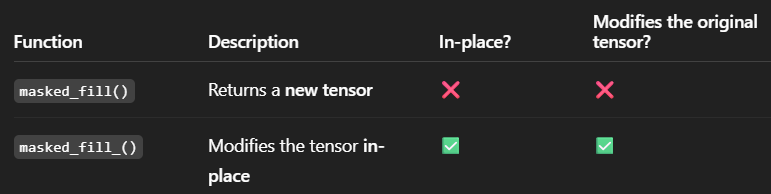

In PyTorch, operations with a trailing underscore are performed in-place, avoiding unnecessary memory copies

In [34]:
torch.manual_seed(123)
context_length=batch.shape[1]
c_attention=CausalAttention(d_in,d_out,context_length,0.0)
context_vecs=c_attention(batch)   #calls the forward method
context_vecs.shape

torch.Size([2, 6, 2])

In [35]:
context_vecs

tensor([[[-0.0805,  0.0395],
         [-0.2229, -0.0032],
         [-0.4078, -0.0543],
         [-0.5106, -0.1021],
         [-0.7717, -0.1852],
         [-1.1736, -0.3316]],

        [[-0.0805,  0.0395],
         [-0.2229, -0.0032],
         [-0.4078, -0.0543],
         [-0.5106, -0.1021],
         [-0.7717, -0.1852],
         [-1.1736, -0.3316]]], grad_fn=<UnsafeViewBackward0>)

## Multi-Head Attention

Implementing a simple MultiHeadAttentionWrapper class that stacks multiple instances of the causal attention class.



In [36]:
class MultiheadAttentionWrapper(nn.Module):
    def __init__(self,d_in,d_out,context_length,dropout,n_heads,qkv_bias=False):
        super().__init__()
        self.heads=nn.ModuleList(
            [CausalAttention(d_in,d_out,context_length,dropout,qkv_bias)
            for _ in range(n_heads)])

    def forward(self,x):
      return torch.cat([head(x) for head in self.heads],dim=-1)

In [50]:
#creating an instance
torch.manual_seed(123)
context_lenth=batch.shape[1]
n_heads=2
d_in,d_out=3,2
multihead_attention=MultiheadAttentionWrapper(d_in,d_out,context_length,0.0,n_heads)
context_vecs=multihead_attention(batch)
print(context_vecs)
context_vecs.shape

tensor([[[-0.0805,  0.0395,  0.0778,  0.0173],
         [-0.2229, -0.0032,  0.2146,  0.1180],
         [-0.4078, -0.0543,  0.3862,  0.2435],
         [-0.5106, -0.1021,  0.5000,  0.3412],
         [-0.7717, -0.1852,  0.7383,  0.4883],
         [-1.1736, -0.3316,  1.1221,  0.8454]],

        [[-0.0805,  0.0395,  0.0778,  0.0173],
         [-0.2229, -0.0032,  0.2146,  0.1180],
         [-0.4078, -0.0543,  0.3862,  0.2435],
         [-0.5106, -0.1021,  0.5000,  0.3412],
         [-0.7717, -0.1852,  0.7383,  0.4883],
         [-1.1736, -0.3316,  1.1221,  0.8454]]], grad_fn=<CatBackward0>)


torch.Size([2, 6, 4])

## Multi-Head Attention with weight splits

In [51]:
class MultiheadAttention(nn.Module):
  def __init__(self,d_in,d_out,context_length,dropout,n_heads,qkv_bias=False):
    super().__init__()
    assert (d_out % n_heads == 0), \
            "d_out must be divisible by num_heads"

    self.d_out=d_out
    self.head_dim=d_out // n_heads
    self.n_heads=n_heads
    self.W_query = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_key = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.W_value = nn.Linear(d_in, d_out, bias=qkv_bias)
    self.out_proj = nn.Linear(d_out, d_out)
    self.dropout=nn.Dropout(dropout)
    self.register_buffer(
        "mask",
        torch.triu(torch.ones(context_length, context_length),
                    diagonal=1)
    )

  def forward(self,x):
    b, num_tokens, d_in = x.shape
    keys = self.W_key(x)
    queries = self.W_query(x)
    values = self.W_value(x)

    #unrolling the d_out dim into n_heads and head_dim
    keys = keys.view(b, num_tokens, self.n_heads, self.head_dim)
    values = values.view(b, num_tokens, self.n_heads, self.head_dim)
    queries = queries.view(b, num_tokens, self.n_heads, self.head_dim)

  #transpose to rearrange dimensions
  #(b, num_tokens, n_heads, head_dim) -> (b, n_heads, num_tokens, head_dim)
    keys = keys.transpose(1, 2)
    queries = queries.transpose(1, 2)
    values = values.transpose(1, 2)

    attn_scores = queries @ keys.transpose(2, 3)
    mask_bool = self.mask.bool()[:num_tokens, :num_tokens]
    attn_scores.masked_fill_(mask_bool,-torch.inf)

    attn_weights = torch.softmax(attn_scores / keys.shape[-1]**0.5, dim=-1)
    attn_weights = self.dropout(attn_weights)

    #context vectors (dimensions changed back)
    context_vec = (attn_weights @ values).transpose(1, 2)

    context_vec = context_vec.contiguous().view(b, num_tokens, self.d_out)
    context_vec = self.out_proj(context_vec) # optional projection

    return context_vec

<div class="alert alert-block alert-info">

Step 1: Reduce the projection dim to match desired output dim

Step 2: Use a Linear layer to combine head outputs

Step 3: Tensor shape: (b, num_tokens, d_out)

Step 4: We implicitly split the matrix by adding a `num_heads` dimension. Then we unroll last dim: (b,
num_tokens, d_out) -> (b, num_tokens, num_heads, head_dim)

Step 5: Transpose from shape (b, num_tokens, num_heads, head_dim) to (b, num_heads, num_tokens, head_dim)

Step 6: Compute dot product for each head

Step 7: Mask truncated to the number of tokens

Step 8: Use the mask to fill attention scores

Step 9: Tensor shape: (b, num_tokens, n_heads, head_dim)

Step 10: Combine heads, where self.d_out = self.num_heads * self.head_dim

Step 11: Add an optional linear projection
</div>

In [52]:
torch.manual_seed(123)
batch_size, context_length, d_in = batch.shape
d_out = 2
mha = MultiheadAttention(d_in, d_out, context_length, 0.0, n_heads=2)
context_vecs = mha(batch)
print(context_vecs)
context_vecs.shape

tensor([[[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]],

        [[0.3190, 0.4858],
         [0.2943, 0.3897],
         [0.2856, 0.3593],
         [0.2693, 0.3873],
         [0.2639, 0.3928],
         [0.2575, 0.4028]]], grad_fn=<ViewBackward0>)


torch.Size([2, 6, 2])